In [153]:
import pandas as pd
import numpy as np

In [154]:
# Download and Load the Titanic Data set.
data = pd.read_csv("titanic.csv")

In [155]:
# Use Isnull() to identify the missing values of the Titanic Data Set.
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [156]:
data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S
508,509,0,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,NaN,S
586,587,0,2,"Jarvis, Mr. John Denzil",male,47.0,0,0,237565,15.0000,NaN,S
801,802,1,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,NaN,S
234,235,0,2,"Leyson, Mr. Robert William Norman",male,24.0,0,0,C.A. 29566,10.5000,NaN,S
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S
775,776,0,3,"Myhrman, Mr. Pehr Fabian Oliver Malkolm",male,18.0,0,0,347078,7.7500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
774,775,1,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S


In [157]:
np.isnan(data["Cabin"][165])

True

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [159]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [173]:
# fill in null values in the Age feature on the data set with its mode.
# Our dataframe has na values in these features:
# Age, cabin, embarked.
# fill in the missing values with the modes.
modes = data.mode().loc[0,["Age", "Cabin", "Embarked"]]
mode_age = modes["Age"]
mode_cabin = modes["Cabin"]
mode_embarked = modes["Embarked"]

In [176]:
# Use the fillna method to fill in missing column values
# with their respective modes.

data["Age"] = data["Age"].fillna(mode_age)
data["Cabin"] = data["Cabin"].fillna(mode_cabin)
data["Embarked"] = data["Embarked"].fillna(mode_embarked)
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [179]:
# Drop rows that still contain NA
# There are no NA rows, so we don't need to drop any.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [185]:
# Drop cabin column
data_nocab = data.drop("Cabin", axis=1)
data_nocab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [229]:
# Calculate Z Score for SibSp
# We will calculate the z score of each value in the SipSp column.
# Place them into a new column in the dataframe.

sib_sp = data_nocab["SibSp"]
data_nocab["SibSp_Scores"] = (sib_sp - sib_sp.mean()) / sib_sp.std()
data_nocab["SibSp_Scores"]

0      0.432550
1      0.432550
2     -0.474279
3      0.432550
4     -0.474279
         ...   
886   -0.474279
887   -0.474279
888    0.432550
889   -0.474279
890   -0.474279
Name: SibSp_Scores, Length: 891, dtype: float64

In [230]:
# If we did this right, 
# The standard deviation of the result should be 1.
data_nocab["SibSp_Scores"].std()

1.0000000000000064

SibSp              AxesSubplot(0.125,0.125;0.352273x0.755)
SibSp_Scores    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

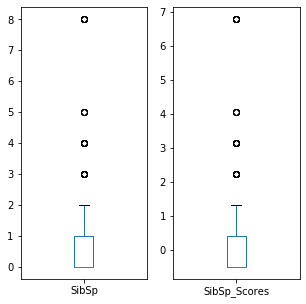

In [231]:
# find the outliers for sibsp using box plots
data_nocab[["SibSp", "SibSp_Scores"]].plot(kind="box", subplots=True, figsize=(5,5))


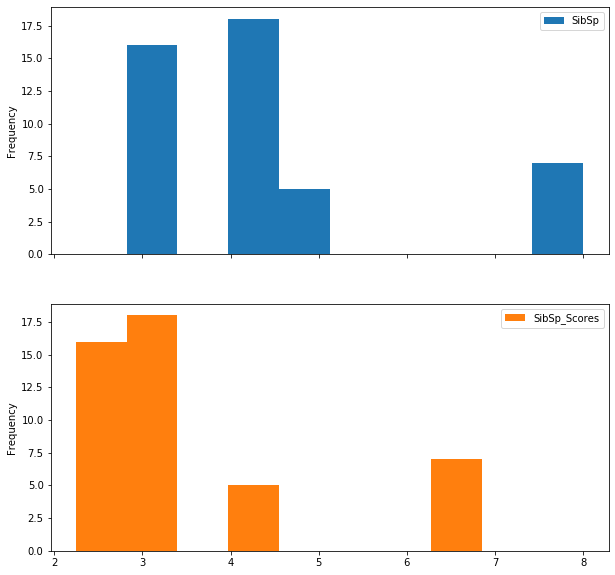

In [302]:
# Those are some extreme outliers. Take a look at their rows.
quantiles = data_nocab["SibSp"].quantile([0.25, 0.75])
iqr = quantiles_scores.iloc[1] - quantiles_scores.iloc[0]
outliers = data_nocab["SibSp"] > (quantiles.iloc[1] + 1.5 * iqr)

df_outliers = data_nocab[outliers]
_= df_outliers[["SibSp", "SibSp_Scores"]].plot(kind="hist", subplots=True, figsize=(10,10))

In [308]:
df_outliers["SibSp"].value_counts()

4    18
3    16
8     7
5     5
Name: SibSp, dtype: int64